<a href="https://colab.research.google.com/github/allokkk/Internship-task/blob/master/Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
data=pd.read_csv("/content/gdrive/My Drive/musk_csv.csv")

In [73]:
print(data.shape)

(6598, 170)


In [74]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [0]:
columns_to_Drop=["conformation_name","molecule_name","class","ID"]
target=data["class"]

In [0]:
data=data.drop(columns_to_Drop,axis=1)

In [77]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80


In [78]:
print(data.shape)

(6598, 166)


In [79]:
print(target.shape)

(6598,)


In [0]:
from sklearn.model_selection import train_test_split

In [81]:
 x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

 print(x_train.shape,y_train.shape)
 print(x_test.shape,y_test.shape)

(5278, 166) (5278,)
(1320, 166) (1320,)


In [82]:
#creat A model


from keras.layers import Embedding,SimpleRNN,Dense
from keras.models import Sequential
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

model=Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['acc'])

In [84]:
from keras.callbacks import ModelCheckpoint#reduce overfitting nd save best model
from keras.callbacks import EarlyStopping#save time


checkpoint=ModelCheckpoint("Best_RNNinternship.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)
earlyStopping=EarlyStopping(monitor='val_acc',patience=2)



hist=model.fit(x_train,y_train,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint])

Train on 4222 samples, validate on 1056 samples
Epoch 1/10
4222/4222 [==============================] - 2s 568us/step - loss: 0.4380 - acc: 0.8356 - val_loss: 0.3674 - val_acc: 0.8523
Epoch 2/10
4222/4222 [==============================] - 2s 453us/step - loss: 0.3109 - acc: 0.8761 - val_loss: 0.2653 - val_acc: 0.9100
Epoch 3/10
4222/4222 [==============================] - 2s 452us/step - loss: 0.2237 - acc: 0.9207 - val_loss: 0.2374 - val_acc: 0.9138
Epoch 4/10
4222/4222 [==============================] - 2s 449us/step - loss: 0.1763 - acc: 0.9370 - val_loss: 0.2013 - val_acc: 0.9271
Epoch 5/10
4222/4222 [==============================] - 2s 456us/step - loss: 0.1501 - acc: 0.9474 - val_loss: 0.1982 - val_acc: 0.9290
Epoch 6/10
4222/4222 [==============================] - 2s 478us/step - loss: 0.1306 - acc: 0.9548 - val_loss: 0.1963 - val_acc: 0.9309
Epoch 7/10
4222/4222 [==============================] - 2s 449us/step - loss: 0.1148 - acc: 0.9621 - val_loss: 0.1952 - val_acc: 0.9280


## GRAPHICAL REPRESENTATION

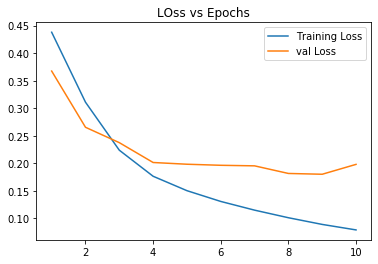

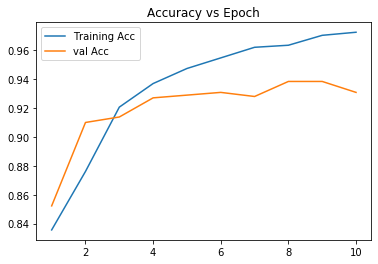

In [85]:
import matplotlib.pyplot as plt

acc= hist.history['acc']
val_acc=hist.history['val_acc']

loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs= range(1,len(loss)+1)

plt.title("LOss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="val Loss")
plt.legend()
plt.show()

plt.title("Accuracy vs Epoch")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="val Acc")
plt.legend()
plt.show()

In [86]:
!ls

Best_RNNinternship.h5  gdrive  sample_data


In [0]:
model.load_weights("Best_RNNinternship.h5")

In [88]:
  model.evaluate(x_test,y_test)

1320/1320 [==============================] - 0s 352us/step


[0.1981788164117571, 0.9295454545454546]

In [89]:
model.evaluate(x_train,y_train)

5278/5278 [==============================] - 2s 333us/step


[0.09026397166716506, 0.9725274723919561]

In [90]:
hist2=model.fit(x_test,y_test,epochs=10,batch_size=128,callbacks=[checkpoint])

Epoch 1/10
1320/1320 [==============================] - 1s 452us/step - loss: 0.1987 - acc: 0.9280
Epoch 2/10
 384/1320 [=======>......................] - ETA: 0s - loss: 0.1708 - acc: 0.9557

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1320/1320 [==============================] - 1s 460us/step - loss: 0.1478 - acc: 0.9515
Epoch 3/10
1320/1320 [==============================] - 1s 451us/step - loss: 0.1214 - acc: 0.9568
Epoch 4/10
1320/1320 [==============================] - 1s 460us/step - loss: 0.0990 - acc: 0.9697
Epoch 5/10
1320/1320 [==============================] - 1s 503us/step - loss: 0.0885 - acc: 0.9712
Epoch 6/10
1320/1320 [==============================] - 1s 501us/step - loss: 0.0695 - acc: 0.9811
Epoch 7/10
1320/1320 [==============================] - 1s 459us/step - loss: 0.0514 - acc: 0.9894
Epoch 8/10
1320/1320 [==============================] - 1s 457us/step - loss: 0.0368 - acc: 0.9955
Epoch 9/10
1320/1320 [==============================] - 1s 454us/step - loss: 0.0422 - acc: 0.9902
Epoch 10/10
1320/1320 [==============================] - 1s 468us/step - loss: 0.0321 - acc: 0.9947


## Model Accuracy and model loss graph

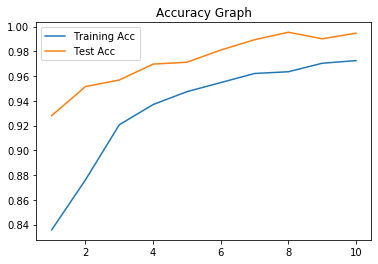

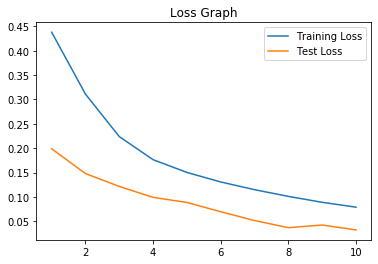

In [91]:
#training vs testing accuracy

test_acc= hist2.history['acc']
train_acc= hist.history['acc']


plt.title("Accuracy Graph")
plt.plot(epochs,train_acc,label="Training Acc")
plt.plot(epochs,test_acc,label="Test Acc")
plt.legend()
plt.show()

#Trainning vs Testing loss
train_loss=hist.history['loss']
test_loss=hist2.history['loss']


plt.title("Loss Graph")
plt.plot(epochs,train_loss,label="Training Loss")
plt.plot(epochs,test_loss,label="Test Loss")
plt.legend()
plt.show()

